# Atividade #

## Instalando bibliotecas necessarias

In [1]:
! pip install pandas
! pip install seaborn
! pip install matplotlib
! pip install sklearn

     |████████████████████████████████| 10.1 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 28.1 MB/s eta 0:00:01
     |████████████████████████████████| 20.1 MB 32.8 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 33.5 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 23.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 298 kB 18.6 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=8ebfed0b523b1ff770b7f94d905766673c4c5e116d06f5be13ce6a6b3069cf05
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


## Começo

### Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### Importando Dataset

In [3]:
dataset = pd.read_csv('data/winequality-red.csv')

In [4]:
# Vendo o número de linhas e colunas
dataset.shape

(1599, 12)

In [5]:
# Verificando quantidade de valores ausentes
print (dataset.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


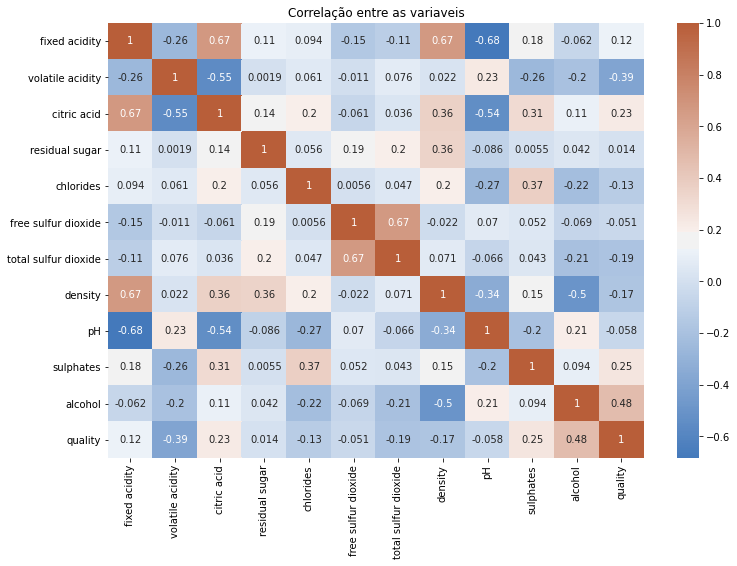

In [6]:
# Vendo as correlações entre as variaveis
## fazendo pesquisas sobre alguns tipos de graficos para analise, achei bem interessante esse porque da pra ver bem 
## as correlações, se percebe que o alcool, acido citrico e os sulfatos tem uma correlação maior sobre a qualidade que os outros.
%matplotlib inline
correlacao= dataset.corr () 
plt.subplots (figsize = (12,8)) 
plt.title('Correlação entre as variaveis')
sns.heatmap (correlacao, xticklabels = correlacao.columns, yticklabels = correlacao.columns, 
             annot = True, cmap = sns.diverging_palette (250 , 25, as_cmap = True))

In [17]:
#criando uma classificação binaria para a qualidade, 

dataset['class_qualidade'] = [1 if x >= 7 else 0 for x in dataset['quality']]

#declaração de variaveis
X = dataset.drop (['quality', 'class_qualidade'], axis = 1) 
y = dataset ['class_qualidade']

In [8]:
# Vendo agora a proporção de bons e maus vinhos 
dataset ['class_qualidade'].value_counts()

0    1382
1     217
Name: class_qualidade, dtype: int64

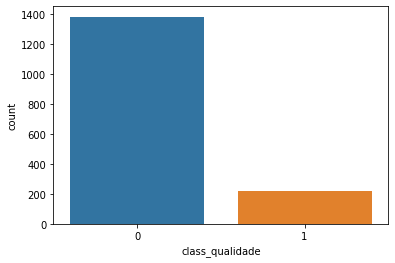

In [9]:
# Vendo agora a proporção em grafico
sns.countplot (dataset['class_qualidade']) 

In [19]:
# ajustando as variáveis
from sklearn.preprocessing import StandardScaler 
X_features = X 
X = StandardScaler().fit_transform(X)

In [21]:
# Usando train e test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [22]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400

